# Import

In [89]:
import matplotlib
import pylab as plt
import numpy as np
import pandas as pd 
from numpy import random

In [90]:
# Read regression training data
train_reg =  pd.read_csv("../Data/Regression_train.csv")

In [91]:
x_train = train_reg.iloc[:,:-1]
x_train.head()

,X Coordinate (km),Y Coordinate (km),Measured Depth (m),Deviation (deg),Abandoned (False),Abandoned (True),Surface-Casing Weight (kg/m),Production-Casing Size (mm),Cumulative GAS Prod. (e3m3),Month Well Spudded
0,-0.330880,-1.169818,-0.470241,0.012105,0.0,1.0,0.099208,-0.168197,-0.332965,-0.715454
1,-0.848944,0.281611,1.417368,1.317553,1.0,0.0,-0.435954,1.339366,0.866927,-0.715454
2,0.322853,-1.837639,-0.946511,0.012105,0.0,1.0,-0.435954,-1.173239,-0.332965,-0.021627
3,0.314839,-1.859064,1.194563,1.589427,0.0,1.0,-0.435954,1.339366,0.866927,1.147194
4,0.419024,-1.521279,1.388296,-1.882407,1.0,0.0,1.187673,1.339366,0.866927,-0.715454


In [92]:
y_train = train_reg.iloc[:,-1]
y_train.describe()

count    1182.000000
mean       50.361427
std         9.281613
min        26.098433
25%        43.678331
50%        50.268425
75%        56.739741
max        74.168289
Name: Emission Rate (m3/day), dtype: float64

# Model Training

In [93]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# Linear Regression

In [94]:
from sklearn.linear_model import LinearRegression

In [95]:
lin_reg = LinearRegression()
lin_reg.fit(x_train,y_train)

LinearRegression()

In [96]:
scores = cross_val_score(lin_reg, x_train,y_train,scoring="neg_mean_squared_error", cv=50)
linreg_rmse_scores = np.sqrt(-scores)
linreg_rmse_scores

array([ 8.66894581,  7.00104748,  7.281229  ,  8.21494128,  9.34701871,
        6.69721552,  8.02350186,  5.51321519,  6.70497179,  6.92600328,
        7.82346188,  6.23756523,  8.60116431,  8.93890595,  8.04651191,
        8.17897539,  8.77301635,  7.49836088,  7.91685792,  9.73257911,
        4.96791015,  8.58961735,  8.69810559,  7.3532993 ,  9.39739395,
        9.49535868,  7.9190201 , 10.28774899,  7.17834091,  6.37831481,
        9.74628542, 10.83958987,  7.7322956 ,  7.01417443,  8.1483416 ,
        5.34955672,  8.43096803,  6.6707266 ,  8.39843103,  7.7866157 ,
        8.26202285,  8.70321637,  7.31650242,  6.48034755, 12.35699371,
        7.02184859,  7.13000069,  6.66378526,  6.31328731,  8.0092868 ])

In [97]:
#Mean of RMSE for Linear Regression
linreg_mean = np.mean(linreg_rmse_scores)
linreg_mean

7.895297504739037

## **Support Vector Machine: Polynomial Kernel**

In [98]:
from sklearn.svm import SVR

In [99]:
np.random.seed(42)
svm = SVR(kernel = 'poly')  
params = {'degree': [2,3,4,5], 
          'C':[1,2,5,10], 
          'coef0':[0,0.1,0.5,1,1.5,2]}
svm_search_cv = GridSearchCV(svm, params, cv=5,scoring="neg_mean_squared_error") 
svm_search_cv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=SVR(kernel='poly'),
             param_grid={'C': [1, 2, 5, 10], 'coef0': [0, 0.1, 0.5, 1, 1.5, 2],
                         'degree': [2, 3, 4, 5]},
             scoring='neg_mean_squared_error')

In [100]:
# Optimum values for the hyperparameters are:
params_svr = svm_search_cv.best_params_
params_svr

{'C': 1, 'coef0': 2, 'degree': 2}

In [101]:
svr = SVR(kernel = 'poly',
          degree = params_svr['degree'],
          C = params_svr['C'],
          coef0 = params_svr['coef0'])
svr.fit(x_train,y_train)

scores=cross_val_score(svr,x_train,y_train, cv=5, scoring="neg_mean_squared_error")
svr_rmse = np.sqrt(-scores)
svr_rmse

array([7.57128746, 8.05066906, 8.23294567, 7.83208945, 8.05381014])

In [102]:
#Mean of RMSE for Poly SVM
svr_mean = np.mean(svr_rmse)
svr_mean

7.948160355969111

## **Decision Trees**

In [103]:
from sklearn.tree import DecisionTreeRegressor

In [104]:
np.random.seed(42)
dtree_reg = DecisionTreeRegressor(random_state=42)
params = {'max_depth':[1,2,3,4,5,6,7,8,9,10],
          'min_samples_split':[2,3,4,5,6,7,8,9,10],
          'min_samples_leaf':[1,2,3,4,5,5,6,7,8,9,10]}
tree_reg_search_cv = GridSearchCV(dtree_reg, params, cv=5,scoring="neg_mean_squared_error") 
tree_reg_search_cv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 5, 6, 7, 8, 9, 10],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10]},
             scoring='neg_mean_squared_error')

In [105]:
# Optimum values for the hyperparameters are:
params_tree_reg = tree_reg_search_cv.best_params_
params_tree_reg

{'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 7}

In [106]:
dtree_reg = DecisionTreeRegressor(max_depth = params_tree_reg['max_depth'], 
                                  min_samples_leaf = params_tree_reg['min_samples_leaf'],
                                  min_samples_split = params_tree_reg['min_samples_split'], 
                                  random_state = 42)
dtree_reg.fit(x_train,y_train)

scores=cross_val_score(dtree_reg,x_train,y_train, cv=5, scoring="neg_mean_squared_error")
dtree_reg_rmse = np.sqrt(-scores)
dtree_reg_rmse

array([7.21241739, 7.32552146, 7.50064528, 7.38676616, 7.46317702])

In [107]:
#Mean of RMSE for Decision Trees Regressor
tree_mean = np.mean(dtree_reg_rmse)
tree_mean

7.377705462003007

## **Random Forest**

In [108]:
from sklearn.ensemble import RandomForestRegressor

In [109]:
np.random.seed(42)
rand_for_reg = RandomForestRegressor(random_state = 42)    
params = {'max_depth':[1,2,3,4,5,6],
          'min_samples_split':[2,3,4,5,6],
          'n_estimators':[50,100,150,200,250,300],
          'bootstrap':[True,False]}
rnd_reg_search_cv = GridSearchCV(rand_for_reg, params, cv=5,scoring="neg_mean_squared_error") 
rnd_reg_search_cv.fit(x_train,y_train)



GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'bootstrap': [True, False],
                         'max_depth': [1, 2, 3, 4, 5, 6],
                         'min_samples_split': [2, 3, 4, 5, 6],
                         'n_estimators': [50, 100, 150, 200, 250, 300]},
             scoring='neg_mean_squared_error')

In [110]:
params_rnd_reg = rnd_reg_search_cv.best_params_
params_rnd_reg

{'bootstrap': True, 'max_depth': 5, 'min_samples_split': 5, 'n_estimators': 50}

In [111]:
rnd_reg = RandomForestRegressor(max_depth = params_rnd_reg['max_depth'], 
                                  n_estimators = params_rnd_reg['n_estimators'],
                                  min_samples_split = params_rnd_reg['min_samples_split'],
                                  bootstrap = params_rnd_reg['bootstrap'],
                                  random_state = 42)
rnd_reg.fit(x_train,y_train)

scores=cross_val_score(rnd_reg,x_train,y_train, cv=5, scoring="neg_mean_squared_error")
rnd_reg_rmse = np.sqrt(-scores)
rnd_reg_rmse

array([6.92393326, 7.21472968, 7.31488586, 7.05991975, 7.47569236])

In [112]:
#Mean of RMSE for Random Forest Regressor
rnd_reg_mean = np.mean(rnd_reg_rmse)
rnd_reg_mean

7.197832182059086

## **Gradient Boosting**

In [113]:
import xgboost
import warnings
warnings.filterwarnings('ignore')

In [114]:
np.random.seed(42)
xgb_reg = xgboost.XGBRegressor(random_state=42)
params = {'learning_rate':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1],
          'booster':['gbtree','gblinear','dart'],
          'n_estimators':[50,100,150,200,250,300]}
boost_search_cv = GridSearchCV(xgb_reg, params, cv=5,scoring="neg_mean_squared_error") 
boost_search_cv.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=42, ...),
             param_grid={'booster': ['gbtree', 'gblinear', 'dart'],
                         'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7,
                                           0.8, 0.9, 1],
                         'n_estimators': [50, 100, 150, 200, 250, 300]},
             scoring='neg_mean_squared_error')

In [115]:
params_xgb_reg = boost_search_cv.best_params_
params_xgb_reg

{'booster': 'gbtree', 'learning_rate': 0.1, 'n_estimators': 50}

In [116]:
xgb = xgboost.XGBRegressor(learning_rate = params_xgb_reg['learning_rate'],
                           booster = params_xgb_reg['booster'],
                           n_estimators = params_xgb_reg['n_estimators'],
                           random_state = 42)
xgb.fit(x_train,y_train)

scores=cross_val_score(xgb,x_train,y_train, cv=5, scoring="neg_mean_squared_error")
xgb_rmse = np.sqrt(-scores)
xgb_rmse

array([7.25028591, 7.80839616, 7.65782902, 6.92480923, 7.77408055])

In [117]:
#Mean of RMSE for Gradient Boosting Regressor
xgb_mean = np.mean(xgb_rmse)
xgb_mean

7.483080173058052

## Training Summary

In [118]:
lin_reg = LinearRegression()

svr = SVR(kernel = 'poly',
          degree = params_svr['degree'],
          C = params_svr['C'],
          coef0 = params_svr['coef0'])

dtree_reg = DecisionTreeRegressor(max_depth = params_tree_reg['max_depth'], 
                                  min_samples_leaf = params_tree_reg['min_samples_leaf'],
                                  min_samples_split = params_tree_reg['min_samples_split'], 
                                  random_state = 42)

rnd_reg = RandomForestRegressor(max_depth = params_rnd_reg['max_depth'], 
                                  n_estimators = params_rnd_reg['n_estimators'],
                                  min_samples_split = params_rnd_reg['min_samples_split'],
                                  bootstrap = params_rnd_reg['bootstrap'],
                                  random_state = 42)

xgb = xgboost.XGBRegressor(learning_rate = params_xgb_reg['learning_rate'],
                           booster = params_xgb_reg['booster'],
                           n_estimators = params_xgb_reg['n_estimators'],
                           random_state = 42)

In [119]:
reg=['Linear Regression:', 'SVM: Poly:', 'Decision Tree:','Random Forest:', 'Gradien Boosting:']
i=0
reg_rmse=[]
for regressor in (lin_reg, svr,dtree_reg,rnd_reg,xgb):
    regressor.fit(x_train,y_train)
    scores=cross_val_score(regressor,x_train,y_train, cv=5, scoring="neg_mean_squared_error")
    rmse = np.sqrt(-scores)
    mean = np.mean(rmse)
    reg_rmse.append(mean)
    print(reg[i], mean)
    i+=1

Linear Regression: 7.996005029887622
SVM: Poly: 7.948160355969111
Decision Tree: 7.377705462003007
Random Forest: 7.197832182059086
Gradien Boosting: 7.483080173058052


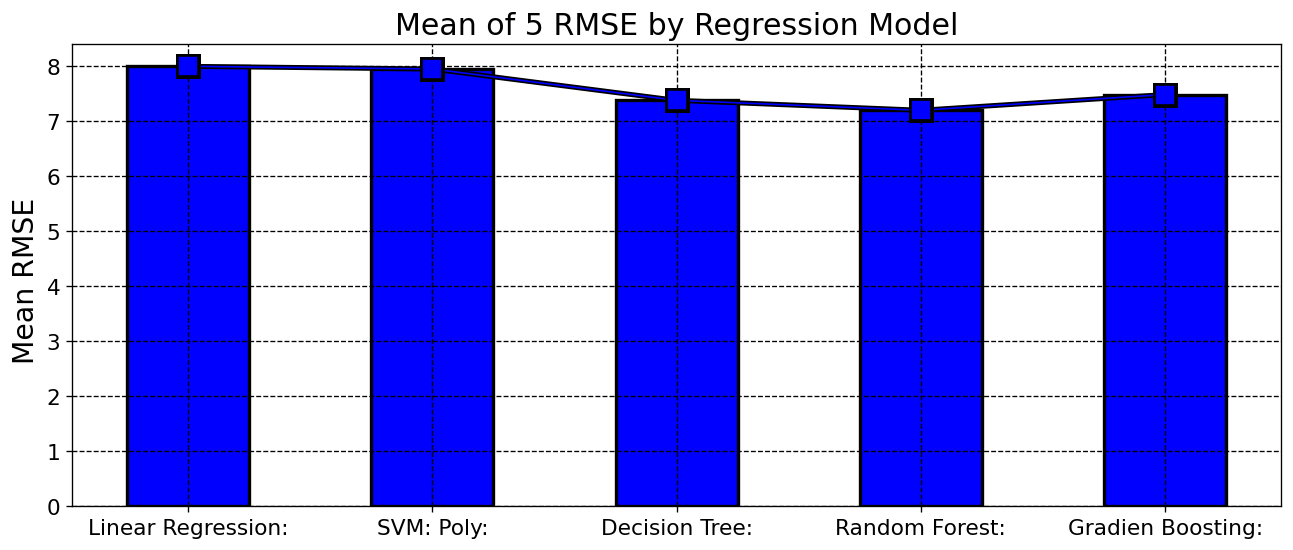

In [120]:
import matplotlib.patheffects as pe

font = {'size'   :13}
matplotlib.rc('font', **font)
fig, ax1 = plt.subplots(figsize=(13, 5), dpi= 120, facecolor='w', edgecolor='k')

plt.plot(reg,reg_rmse,'bs-',linewidth=1,path_effects=[pe.Stroke(linewidth=3, foreground='k'), pe.Normal()],
                                                             markersize=12,label='Accuracy',markeredgecolor='k')
ax1.bar(reg,reg_rmse,lw =2, align='center',width=0.5, alpha=1, ecolor='black', edgecolor='k',capsize=1,color='b')
ax1.set_xticklabels(reg, rotation=0)     
ax1.xaxis.grid(color='k', linestyle='--', linewidth=0.8) 
ax1.yaxis.grid(color='k', linestyle='--', linewidth=0.8)
plt.ylabel('Mean RMSE ',fontsize='17')
plt.title('Mean of 5 RMSE by Regression Model',fontsize='18')
plt.show()

## Test Result

In [121]:
# Read regression test data
test_reg =  pd.read_csv("../Data/Regression_test.csv")
x_test = test_reg.iloc[:,:-1]
y_test = test_reg.iloc[:,-1]

In [122]:
from sklearn.metrics import mean_squared_error

reg=['Linear Regression:', 'SVM: Poly:', 'Decision Tree:','Random Forest:', 'Gradien Boosting:']

i=0
test_rmse=[]
for regressor in (lin_reg, svr,dtree_reg,rnd_reg,xgb):
  pred=regressor.predict(x_test)
  mse = mean_squared_error(y_test, pred)
  rmse= np.sqrt(mse)
  test_rmse.append(rmse)
  print(reg[i], rmse)
  i+=1

Linear Regression: 8.089101866463828
SVM: Poly: 8.122991621926433
Decision Tree: 7.27063667485321
Random Forest: 7.137222302595709
Gradien Boosting: 7.5343360604279095


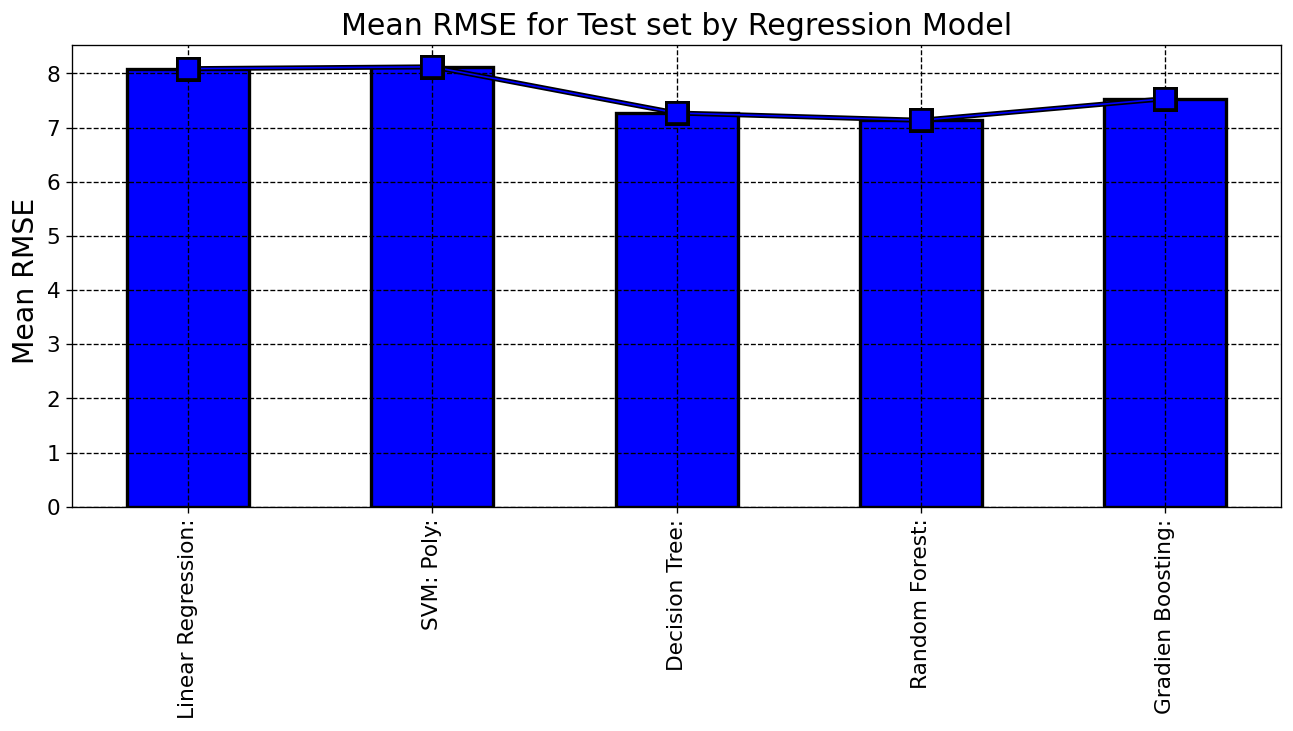

In [123]:
import matplotlib.patheffects as pe

font = {'size'   :13}
matplotlib.rc('font', **font)
fig, ax1 = plt.subplots(figsize=(13, 5), dpi= 120, facecolor='w', edgecolor='k')

plt.plot(reg,test_rmse,'bs-',linewidth=1,path_effects=[pe.Stroke(linewidth=3, foreground='k'), pe.Normal()],
                                                             markersize=12,label='Accuracy',markeredgecolor='k')
ax1.bar(reg,test_rmse,lw =2, align='center',width=0.5, alpha=1, ecolor='black', edgecolor='k',capsize=1,color='b') 
ax1.set_xticklabels(reg, rotation=90)     
ax1.xaxis.grid(color='k', linestyle='--', linewidth=0.8) 
ax1.yaxis.grid(color='k', linestyle='--', linewidth=0.8)
plt.ylabel('Mean RMSE ',fontsize='17')
plt.title('Mean RMSE for Test set by Regression Model',fontsize='18')
plt.show()